In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
a = 1
b = 50

def f(x):
    return 1/np.sinh(x)

def antiderivative(x):
    return np.log(np.tanh(x/2))


In [29]:
class Integral:
    def __init__(self, function, interval):
        self.f = function
        self.a, self.b = interval
        
    def calculate(self, method = "simpson", h = 0.001):
        '''
        method : str
            one from the ['simpson', 'trapezoidal', 'rectangular']
        h : float
            step between the nodes
        '''
        if method == "simpson":
            return self.simpson_rule(h)
        elif method == "trapezoidal":
            return self.trapezoidal_rule(h)
        elif method == "rectangular":
            return self.rectangular_rule(h)
        elif method == "gauss":
            return self.gaussian_rule(h)
        else:
            raise NameError(f"There is no method with name {method}")
    
    def simpson_rule(self, h):
        x = np.arange(start=self.a, stop=self.b + h, step = h)
        value = 0
        for i in range(0,len(x)-1):
            x_middle = x[i] + h/2
            value += self.f(x[i]) + 4 * self.f(x_middle) + self.f(x[i+1])
        return (h/2) * value / 3
    
    def trapezoidal_rule(self, h):
        x = np.arange(start=self.a, stop=self.b + h, step = h)
        value = (self.f(x[0]) + self.f(x[-1])) / 2 + np.sum([self.f(x[i]) for i in range(1,len(x)-1)])
        return value * h
    
    def gaussian_rule(self, h):
        x = np.arange(start=self.a, stop=self.b + h, step = h)
        value = 0
        for i in range(0,len(x)-1):
            value += (x[i+1] - x[i]) / 2 * (self.f((x[i]+x[i+1])/2 - (x[i+1] - x[i]) / (2*3**(1/2))) +\
            self.f((x[i]+x[i+1])/2 + (x[i+1] - x[i]) / (2*3**(1/2))))
        return value
    def rectangular_rule(self, h, rect_type = 'right'):
        '''
        h : float
            step between the nodes
        rect_type : str
            one from the ['right', 'left', 'center']
        '''
        x = np.arange(start=self.a, stop=self.b + h, step = h)
        if rect_type == 'right':
            return h * sum(self.f(x[i]) for i in range(1, len(x)))
        elif rect_type == 'left':
            return h * sum(self.f(x[i]) for i in range(0, len(x) - 1))
        elif rect_type == 'center':
            return (self.f(x[0]) + self.f(x[-1])) / 2 +\
            sum([self.f(x[i]) for i in range(1,len(x)-1)])
        else:
            raise NameError(f"There is no type with name {rect_type}")

In [30]:
F = Integral(f,(a,b))

def integration_error(F = F, real_F = antiderivative, method = 'simpson', h = 0.01):
    a, b = F.a, F.b
    integral_value = F.calculate(method,h)
    return abs(integral_value - (antiderivative(b) - antiderivative(a)))

In [31]:
def cut_num(number,count=6):
    number_dec = str(number-int(number))[1:count+2]
    return str(int(number)) + number_dec


In [32]:
def plot_errors():
    sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
    fig = plt.figure(figsize=(12,12))
    
    hh = np.arange(start=1e-4, stop=1e-1, step=1e-3)
    simpson_errors = [integration_error(method="simpson", h=h_i) for h_i in hh]
    plt.plot(np.log2(hh), np.log2(simpson_errors), 'r-', label='method = simpson', lw=3)
    trapezoidal_errors = [integration_error(method="trapezoidal", h=h_i) for h_i in hh]
    plt.plot(np.log2(hh), np.log2(trapezoidal_errors), 'b-', label='method = trapezoidal', lw=3)
    gaussian_errors = [integration_error(method="gauss", h=h_i) for h_i in hh]
    plt.plot(np.log2(hh), np.log2(gaussian_errors), 'y-', label='method = gaussian', lw=3)
    rectangular_errors = [integration_error(method="rectangular", h=h_i) for h_i in hh]
    plt.plot(np.log2(hh), np.log2(rectangular_errors), 'g-', label='method = rectangular', lw=3)   
    
    k4 = (np.log2(simpson_errors)[-1] -  np.log2(simpson_errors)[-40]) / (np.log2(hh[-1]) - np.log2(hh[-40]))
    k2 = (np.log2(trapezoidal_errors)[-1] -  np.log2(trapezoidal_errors)[-40]) / (np.log2(hh[-1]) - np.log2(hh[-40]))
    k1 = (np.log2(rectangular_errors)[-1] -  np.log2(rectangular_errors)[-40]) / (np.log2(hh[-1]) - np.log2(hh[-40]))
    
        
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(-6.5, -35, f"k4 = {cut_num(k4)}",  fontsize=14,
        verticalalignment='top', bbox=props)
    plt.text(-6.5, -16.5, f"k2 = {cut_num(k2)}",  fontsize=14,
        verticalalignment='top', bbox=props)
    plt.text(-6.5, -8.5, f"k1 = {cut_num(k1)}",  fontsize=14,
        verticalalignment='top', bbox=props)    
    
    plt.legend(fontsize=13)
    plt.title("Dependence of integration error from step size",fontsize=20)
    plt.xlabel("log2(h)", fontdict={'fontsize':14})
    plt.ylabel("log2(r)", fontdict={'fontsize':14})

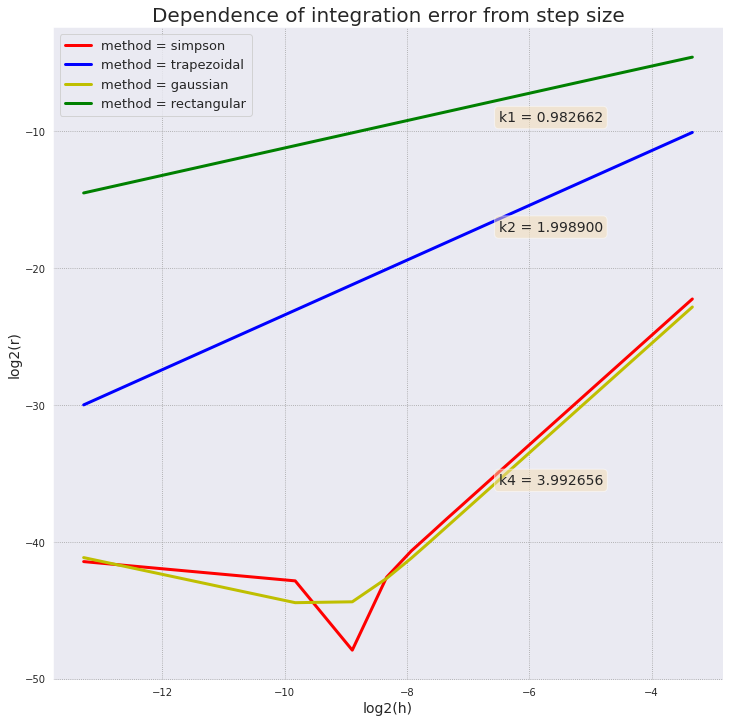

In [33]:
plot_errors()

![](download.png)
